# importing important libraries

In [25]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Exploring dataset

In [26]:
data = pd.read_csv('mcdonalds.csv')

In [27]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [28]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [29]:
mcdonalds_data.shape

(1453, 15)

In [30]:
new_data = data.loc[:,'yummy':'disgusting']

In [31]:
def yesRno_to_num(data):
    data = data.applymap(lambda x: 1 if x == 'Yes' else 0)
    return data

In [33]:
new_data = yesRno_to_num(new_data)

In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [37]:
np.round(np.mean(new_data,axis=0),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

# Feature selection for segmentation

In [38]:
selected_features = ['Age', 'VisitFrequency', 'Gender']


# Handling missing values

In [39]:
selected_data = data[selected_features].dropna()


In [40]:
frequency_mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}
selected_data['VisitFrequency'] = selected_data['VisitFrequency'].map(frequency_mapping)


# converting categprical data to numerical data

In [41]:
 selected_data = pd.get_dummies(selected_data)

In [42]:
# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Applying K mean clustering

In [43]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

C:\Users\ASUS\conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
selected_data['Cluster'] = cluster_labels

In [45]:
print("Cluster centroids:")
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(centroids):
    print(f"Cluster {i + 1}: Age={centroid[0]:.2f}, VisitFrequency={centroid[1]:.2f}")

Cluster centroids:
Cluster 1: Age=56.26, VisitFrequency=1.68
Cluster 2: Age=44.30, VisitFrequency=2.43
Cluster 3: Age=33.47, VisitFrequency=3.01


<Figure size 1000x600 with 0 Axes>

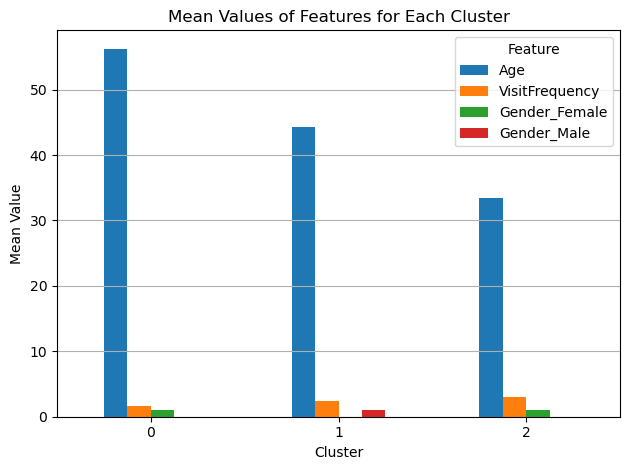

In [46]:
cluster_summary = selected_data.groupby('Cluster').mean()

#make bar plot
plt.figure(figsize=(10, 6))
cluster_summary.plot(kind='bar')
plt.title('Mean Values of Features for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Feature', loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [47]:
cluster_summary = selected_data.groupby('Cluster')[['Age', 'VisitFrequency']].sum()

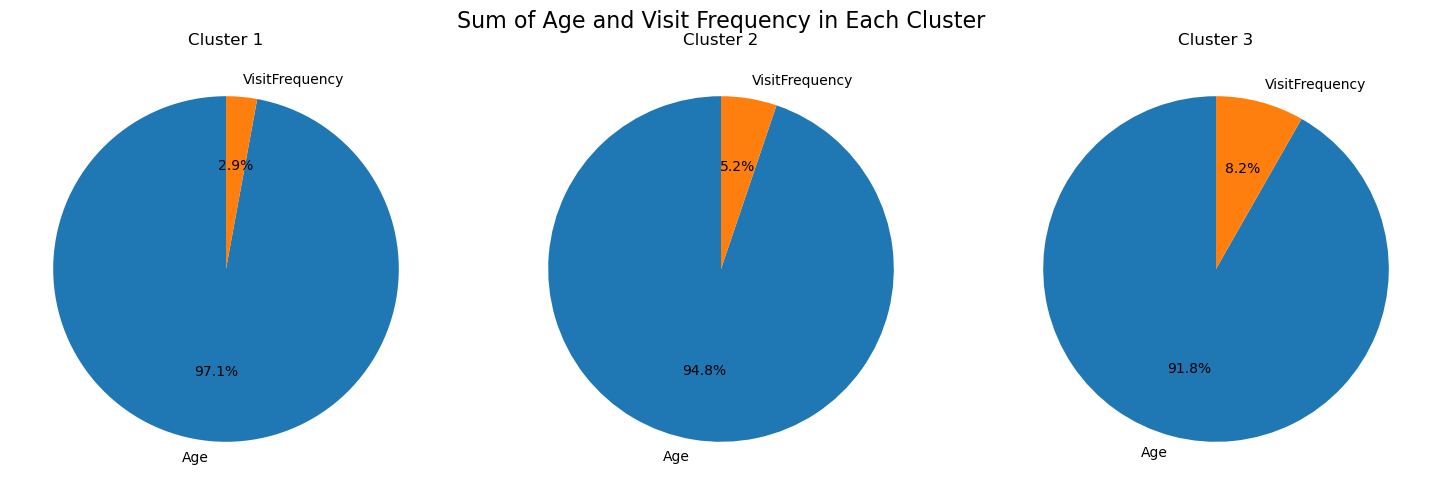

In [48]:
fig, axes = plt.subplots(1, k, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.pie(cluster_summary.loc[i], labels=cluster_summary.columns, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Cluster {i+1}')

plt.suptitle('Sum of Age and Visit Frequency in Each Cluster', fontsize=16)
plt.tight_layout()
plt.show()

In [49]:
cluster_summary = selected_data.groupby('Cluster').mean()
print("\nCluster summary:")
print(cluster_summary)


Cluster summary:
               Age  VisitFrequency  Gender_Female  Gender_Male
Cluster                                                       
0        56.258883        1.675127            1.0          0.0
1        44.297744        2.433083            0.0          1.0
2        33.469543        3.007614            1.0          0.0
